# Medical Insurance Regression Project
## 의료 보험비 회귀 예측
https://www.kaggle.com/datasets/mirichoi0218/insurance/data

<br>

#### feature (6개)
- age: 주요 수혜자의 나이
- sex: 보험계약자 성별, 여성, 남성
- bmi: 신체에 대한 이해를 제공하는 체질량지수  
  <sub>키에 비해 상대적으로 높거나 낮은 체중, 신장과 체중의 비율을 이용한 객관적인 체중지수(kg/m^2)</sub>  
  <sub>이상적으로는 18.5~24.9</sub>
- children : 건강보험 적용 자녀 수 / 부양가족 수
- smoker: 흡연
- region: 미국 내 수혜자의 주거 지역, 북동부, 남동부, 남서부, 북서부.

<br>

#### target
- charges : 건강보험에서 청구하는 개인의료비

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 컬러맵 가져오기
cmap = plt.get_cmap('Pastel1')
# 컬러맵의 색상 선택
colors = cmap(np.array([0, 1, 2, 3, 4, 5, 6]))

# 한글 폰트 경로 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import pandas as pd

# 데이터 세트 호출
m_df = pd.read_csv('./datasets/medical_insurance.csv', low_memory=False)
m_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2767,47,female,45.320,1,no,southeast,8569.86180
2768,21,female,34.600,0,no,southwest,2020.17700
2769,19,male,26.030,1,yes,northwest,16450.89470
2770,23,male,18.715,0,no,northwest,21595.38229


#### 📊 데이터 탐색

In [3]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [4]:
gender_count = m_df.sex.value_counts().reset_index()
gender_count

,sex,count
0,male,1406
1,female,1366


In [5]:
smoker_count = m_df.smoker.value_counts().reset_index()
smoker_count

,smoker,count
0,no,2208
1,yes,564


In [6]:
region_count = m_df.region.value_counts().reset_index()
region_count

,region,count
0,southeast,766
1,southwest,684
2,northwest,664
3,northeast,658


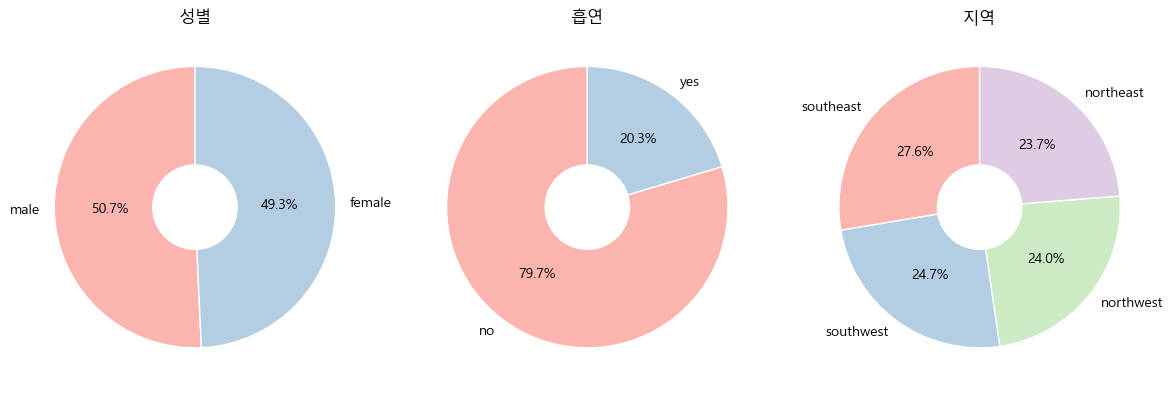

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 타겟 데이터 비중 변경 전/후 차이 그래프 확인
fig, axes = plt.subplots(1, 3, figsize=(12, 10))

# 부채꼴 스타일
wedgeprops = {'width': 0.7, 'edgecolor': 'w', 'linewidth': 1}

gender_counts = gender_count['count']
gender_labels = gender_count['sex']

smoker_counts = smoker_count['count']
smoker_labels = smoker_count['smoker']

region_counts = region_count['count']
region_labels = region_count['region']

# 그래프 그리기
axes[0].pie(gender_counts, labels=gender_labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[0].set_title('성별')

axes[1].pie(smoker_counts, labels=smoker_labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[1].set_title('흡연')

axes[2].pie(region_counts, labels=region_labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=wedgeprops)
axes[2].set_title('지역')

plt.tight_layout()
plt.show()

#### 📊 전처리

In [8]:
# 결측치 확인
m_df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
# 중복행 확인
m_df.duplicated().sum()

1435

In [10]:
# 중복행 제거
pre_m_df = m_df.drop_duplicates().reset_index(drop=True)
# 중복행 제거 확인
pre_m_df.duplicated().sum()

0

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

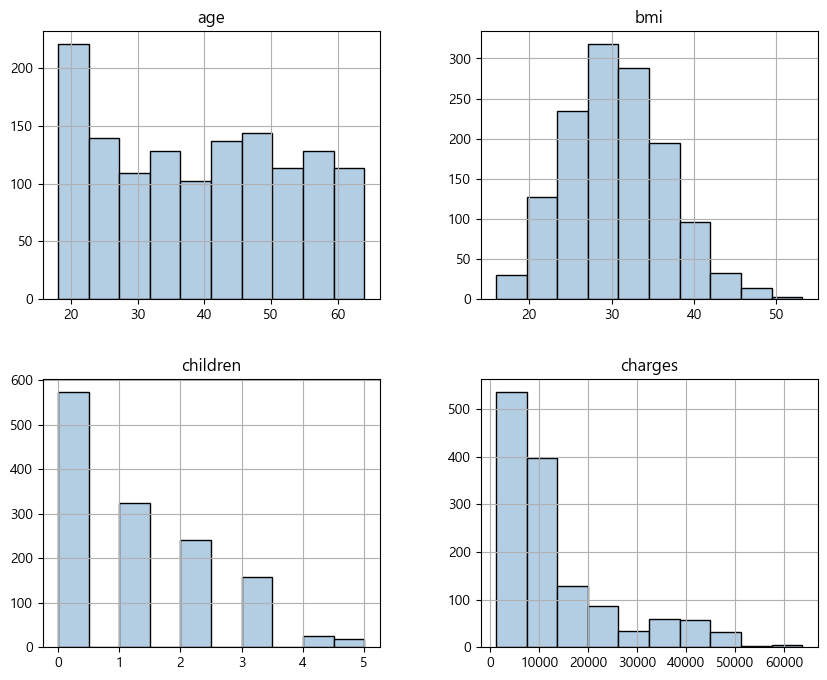

In [11]:
# 데이터 분포 확인
pre_m_df.hist(figsize=(10, 8), color=cmap(np.array([1])), edgecolor='black')

In [12]:
# 기술 통계량(개수, 평균, 사분위 등) 확인
pre_m_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [13]:
from sklearn.preprocessing import LabelEncoder

# 데이터 프레임 복제
enc_m_df = pre_m_df.copy()
encoders = {}

# 문자열 컬럼 추출
columns = ['sex', 'region', 'smoker']

# 반복하여 컬럼 인코딩 처리:
for column in columns:
    # 레이블인코더 객체 생성
    encoder = LabelEncoder()
    # 문자열 데이터 정수로 형변환
    result = encoder.fit_transform(enc_m_df[column])
    # 형변환 값으로 대체
    enc_m_df[column] = result
    # 원본 데이터 담기
    encoders[column] = encoder.classes_

# 원본 데이터 확인
print(encoders)

{'sex': array(['female', 'male'], dtype=object), 'region': array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object), 'smoker': array(['no', 'yes'], dtype=object)}


In [14]:
enc_m_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,1,10600.54830
1333,18,0,31.920,0,0,0,2205.98080
1334,18,0,36.850,0,0,2,1629.83350
1335,21,0,25.800,0,0,3,2007.94500


### 🌟 1Cycle

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_log_error, mean_squared_error, r2_score

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(y_test, prediction)
    print('MSE: {:.4f}, RMSE: {:.4f}, R2: {:.4f}'\
         .format(MSE, RMSE, R2))

#### 📊 선형 회귀 (sklearn)

In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = enc_m_df.iloc[:, :-1], enc_m_df.iloc[:, -1]

# 학습/테스트 및 문제/정답 데이터 세트 분리a
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련
l_r.fit(X_train, y_train)

LinearRegression()

In [17]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 36313339.4238, RMSE: 6026.0550, R2: 0.7724


#### 📊 다중 회귀

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = enc_m_df.iloc[:, :-1], enc_m_df.iloc[:, -1]

# 차원 확장 (3차원)
poly_features = PolynomialFeatures(degree=3).fit_transform(features)

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(poly_features, targets, test_size=0.2, random_state=124)

# 선형 회귀 모델
l_r = LinearRegression()
# 훈련
l_r.fit(X_train, y_train)

LinearRegression()

In [19]:
# 예측
prediction = l_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 26287759.2292, RMSE: 5127.1590, R2: 0.8352


####  📊 회귀 모델

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = enc_m_df.iloc[:, :-1], enc_m_df.iloc[:, -1]

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀 모델 담기
dt_r = DecisionTreeRegressor(random_state=124)
rf_r = RandomForestRegressor(random_state=124, n_estimators=1000)
gb_r = GradientBoostingRegressor(random_state=124)
xgb_r = XGBRegressor(random_state=124)
lgb_r = LGBMRegressor(random_state=124)

models = [dt_r, rf_r, gb_r, xgb_r, lgb_r]

# 모델 별 학습 진행:
for model in models:
    # 모델 학습
    model.fit(X_train, y_train)
    # 예측
    prediction = model.predict(X_test)
    # 모델명 출력 (모델명과 평가 결과가 같이 출력되도록)
    print(model.__class__.__name__)
    # 평가
    get_evaluation(y_test, prediction)

C:\Users\LEGION\anaconda3\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 10.0.1 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


DecisionTreeRegressor
MSE: 36015820.4909, RMSE: 6001.3182, R2: 0.7742
RandomForestRegressor
MSE: 23702452.1780, RMSE: 4868.5164, R2: 0.8514
GradientBoostingRegressor
MSE: 21460319.2537, RMSE: 4632.5284, R2: 0.8655
XGBRegressor
MSE: 26010709.3759, RMSE: 5100.0695, R2: 0.8369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001368 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 1069, number of used features: 6
[LightGBM] [Info] Start training from score 13254.181490
LGBMRegressor
MSE: 23057650.3301, RMSE: 4801.8382, R2: 0.8555


#### 💡 분석
- 선형 패턴을 지니고 있다고 판단되나 회귀 모델 분석 시 R2 점수가 0.74로 상승함에 따라 완전한 선형은 아니고 비선형의 패턴도 띄고 있음을 확인함.
- 회귀 모델 중 GradientBoostingRegressor을 사용하였을 때, 가장 좋은 성능을 보임에 따라 해당 모델을 선택하는 것이 적합하다고 판단됨.

### 🌟 2Cycle
이상치 제거

In [21]:
# 타겟 데이터 이상치 제거
from sklearn.preprocessing import StandardScaler

# 표준화 객체 생성
std = StandardScaler()
# 데이터 표준화 변환
std_result = std.fit_transform(enc_m_df[['charges']])
# 표준화 데이터 프레임 생성
std_m_df = pd.DataFrame(std_result, columns=['charges'])

std_m_df

,charges
0,0.297857
1,-0.954381
2,-0.729373
3,0.719104
4,-0.777499
...,...
1332,-0.221263
1333,-0.914695
1334,-0.962287
1335,-0.931054


In [22]:
# 타겟 데이터 이상치 제거
std_m_df = enc_m_df[std_m_df.charges.between(-1.96, 1.96)]
std_m_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,1,10600.54830
1333,18,0,31.920,0,0,0,2205.98080
1334,18,0,36.850,0,0,2,1629.83350
1335,21,0,25.800,0,0,3,2007.94500


In [23]:
# 이상치 제거후 유지되는 인덱스를 대조하여 원본 데이터 이상치 제거
pstd_m_df = enc_m_df.iloc[std_m_df.index].reset_index(drop=True)
pstd_m_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1219,50,1,30.970,3,0,1,10600.54830
1220,18,0,31.920,0,0,0,2205.98080
1221,18,0,36.850,0,0,2,1629.83350
1222,21,0,25.800,0,0,3,2007.94500


<Axes: >

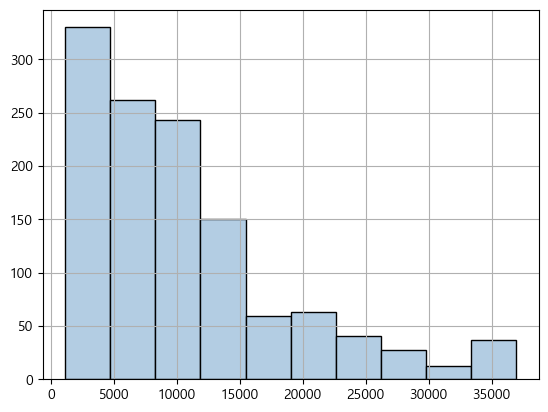

In [24]:
# 종속 변수 분포 확인
pstd_m_df.charges.hist(color=cmap(np.array([1])), edgecolor='black')

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = pstd_m_df.iloc[:, :-1], pstd_m_df.iloc[:, -1]

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀 모델 담기
gb_r = GradientBoostingRegressor(random_state=124)

# 모델 학습
gb_r.fit(X_train, y_train)

# 예측
prediction = gb_r.predict(X_test)

# 모델명 출력 (모델명과 평가 결과가 같이 출력되도록)
print(gb_r.__class__.__name__)
# 평가
get_evaluation(y_test, prediction)

GradientBoostingRegressor
MSE: 15433277.2944, RMSE: 3928.5210, R2: 0.6713


#### 💡 분석
이상치 제거 후 성능이 더 저하됨에 따라 이상치 제거를 진행하지 않기로 함

### 🌟 3Cycle
분포 변환

#### 📊 로그 변환

<Axes: >

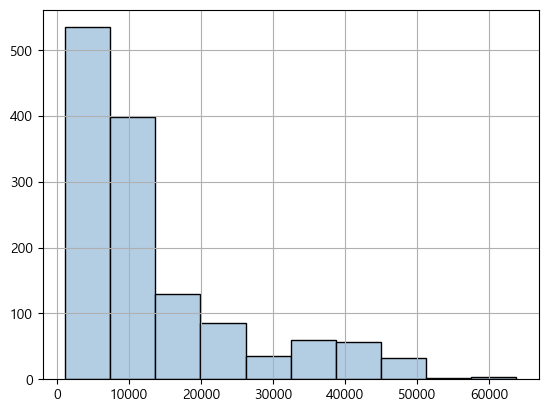

In [26]:
# 종속 변수 분포 확인
enc_m_df.charges.hist(color=cmap(np.array([1])), edgecolor='black')

<Axes: >

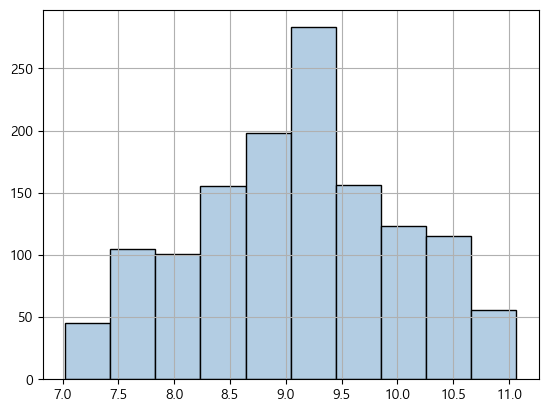

In [27]:
import numpy as np

# 종속 변수 분포 로그 변환
np.log1p(enc_m_df.charges).hist(color=cmap(np.array([1])), edgecolor='black')

In [28]:
# 데이터 프레임 복제
log_m_df = enc_m_df.copy()

# 로그 변환
log_m_df.charges = np.log1p(log_m_df.charges)
log_m_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,9.734236
1,18,1,33.770,1,0,2,7.453882
2,28,1,33.000,3,0,2,8.400763
3,33,1,22.705,0,0,1,9.998137
4,32,1,28.880,0,0,1,8.260455
...,...,...,...,...,...,...,...
1332,50,1,30.970,3,0,1,9.268755
1333,18,0,31.920,0,0,0,7.699381
1334,18,0,36.850,0,0,2,7.396847
1335,21,0,25.800,0,0,3,7.605365


In [29]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = log_m_df.iloc[:, :-1], log_m_df.iloc[:, -1]

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀 모델 담기
gb_r = GradientBoostingRegressor(random_state=124)

# 모델 학습
gb_r.fit(X_train, y_train)

# 예측
prediction = gb_r.predict(X_test)

# 모델명 출력 (모델명과 평가 결과가 같이 출력되도록)
print(gb_r.__class__.__name__)
# 평가
get_evaluation(y_test, prediction)

GradientBoostingRegressor
MSE: 0.1519, RMSE: 0.3897, R2: 0.8271


#### 📊 PowerTransformer

array([[<Axes: title={'center': '0'}>]], dtype=object)

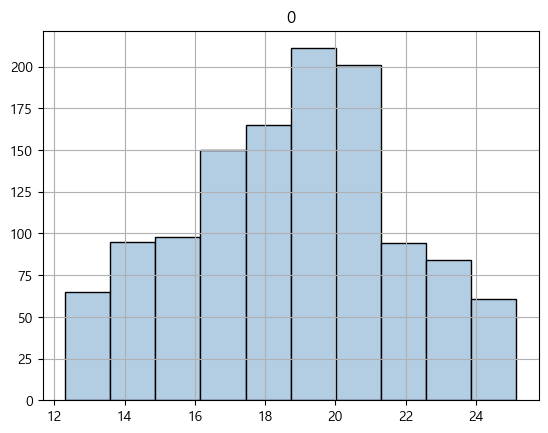

In [113]:
from sklearn.preprocessing import PowerTransformer

# 정규분포에 가깝게 변환 객체 생성
ptf = PowerTransformer(standardize=False)
# 변환 후 결과 저장
result = ptf.fit_transform(pstd_m_df[['charges']])

# 분포 확인
pd.DataFrame(result).hist(color=cmap(np.array([1])), edgecolor='black')

In [114]:
# 데이터 프레임 복제
yeo_m_df = pstd_m_df.copy()

# 변환된 데이터로 새로운 타겟 데이터 생성
yeo_m_df['Target_yeo'] = result

# 사용이 끝난 컬럼 제거
yeo_m_df = yeo_m_df.drop(labels='charges', axis=1)
yeo_m_df

,age,sex,bmi,children,smoker,region,Target_yeo
0,19,0,27.900,0,1,3,21.670016
1,18,1,33.770,1,0,2,13.555550
2,28,1,33.000,3,0,2,16.598254
3,33,1,22.705,0,0,1,22.797186
4,32,1,28.880,0,0,1,16.120202
...,...,...,...,...,...,...,...
1219,50,1,30.970,3,0,1,19.785499
1220,18,0,31.920,0,0,0,14.304192
1221,18,0,36.850,0,0,2,13.385460
1222,21,0,25.800,0,0,3,14.014294


In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = yeo_m_df.iloc[:, :-1], yeo_m_df.iloc[:, -1]

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀 모델 담기
gb_r = GradientBoostingRegressor(random_state=124)

# 모델 학습
gb_r.fit(X_train, y_train)

# 예측
prediction = gb_r.predict(X_test)

# 모델명 출력 (모델명과 평가 결과가 같이 출력되도록)
print(gb_r.__class__.__name__)
# 평가
get_evaluation(y_test, prediction)

GradientBoostingRegressor
MSE: 0.3372, RMSE: 0.5807, R2: 0.8258


#### 💡 분석
로그 및 PowerTransformer 진행 후 성능이 더 저하됨에 따라 변환을 진행하지 않기로 함

### 🌟 4Cycle
OLS, VIF, 상관관계 등 다양한 지표 확인 후 전처리

In [33]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = enc_m_df.iloc[:, :-1], enc_m_df.iloc[:, -1]

# OLS 객체 생성
model = OLS(targets, features)
# 모델 훈련 및 정보 출력
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.873
Method:                 Least Squares   F-statistic:                              1536.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):                        0.00
Time:                        01:42:03   Log-Likelihood:                         -13611.
No. Observations:                1337   AIC:                                  2.723e+04
Df Residuals:                    1331   BIC:                                  2.727e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(features):
    vif = pd.DataFrame()
    vif['vif_score'] = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
    vif['features'] = features.columns
    return vif

In [35]:
# VIF 확인
get_vif(features)

,vif_score,features
0,7.558005,age
1,2.000028,sex
2,10.378567,bmi
3,1.802019,children
4,1.257118,smoker
5,2.924245,region


In [36]:
# 상관관계 확인
enc_m_df.corr()['charges'].sort_values(ascending=False)[1:]

smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

In [37]:
features.corr()

,age,sex,bmi,children,smoker,region
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000


<Axes: >

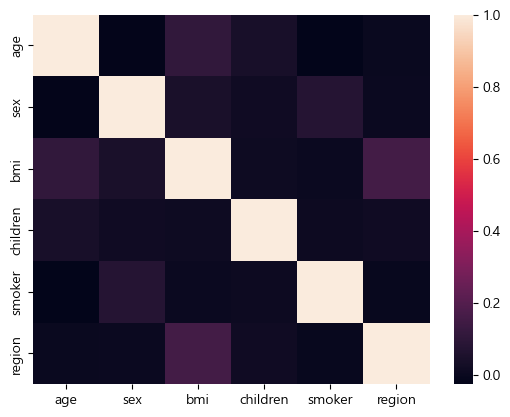

In [38]:
import seaborn as sns

# 상관관계 히트맵 확인
sns.heatmap(features.corr())

#### 💡 분석
- 다중공선성 문제가 있는 것으로 나타났음
- 서로 상관관계가 있는 bmi와 region 중 종속변수와 상관관계가 낮은 region을 제거

In [115]:
# 컬럼 제거
dr_m_df = enc_m_df.drop(labels='region', axis=1)
dr_m_df

,age,sex,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1332,50,1,30.970,3,0,10600.54830
1333,18,0,31.920,0,0,2205.98080
1334,18,0,36.850,0,0,1629.83350
1335,21,0,25.800,0,0,2007.94500


In [40]:
from statsmodels.api import OLS

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = dr_m_df.iloc[:, :-1], dr_m_df.iloc[:, -1]

# OLS 객체 생성
model = OLS(targets, features)
# 모델 훈련 및 정보 출력
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                charges   R-squared (uncentered):                   0.873
Model:                            OLS   Adj. R-squared (uncentered):              0.872
Method:                 Least Squares   F-statistic:                              1825.
Date:                Sun, 23 Jun 2024   Prob (F-statistic):                        0.00
Time:                        01:42:06   Log-Likelihood:                         -13617.
No. Observations:                1337   AIC:                                  2.724e+04
Df Residuals:                    1332   BIC:                                  2.727e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [41]:
# VIF 확인
get_vif(features)

,vif_score,features
0,7.552182,age
1,1.999746,sex
2,8.752980,bmi
3,1.800500,children
4,1.257077,smoker


In [106]:
# 상관관계 확인
dr_m_df.corr()['charges'].sort_values(ascending=False)[1:]

smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
Name: charges, dtype: float64

In [43]:
features.corr()

,age,sex,bmi,children,smoker
age,1.000000,-0.019814,0.109344,0.041536,-0.025587
sex,-0.019814,1.000000,0.046397,0.017848,0.076596
bmi,0.109344,0.046397,1.000000,0.012755,0.003746
children,0.041536,0.017848,0.012755,1.000000,0.007331
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000


<Axes: >

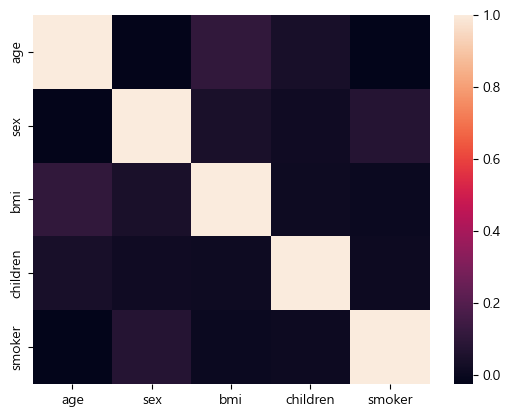

In [44]:
import seaborn as sns

# 상관관계 히트맵 확인
sns.heatmap(features.corr())

In [45]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = dr_m_df.iloc[:, :-1], dr_m_df.iloc[:, -1]

# 학습/테스트 및 문제/정답 데이터 세트 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 회귀 모델 담기
gb_r = GradientBoostingRegressor(random_state=124)

# 모델 학습
gb_r.fit(X_train, y_train)

# 예측
prediction = gb_r.predict(X_test)

# 모델명 출력 (모델명과 평가 결과가 같이 출력되도록)
print(gb_r.__class__.__name__)
# 평가
get_evaluation(y_test, prediction)

GradientBoostingRegressor
MSE: 21463103.3484, RMSE: 4632.8289, R2: 0.8655


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 산점도 행렬 시각화
sns.pairplot(enc_m_df, kind="reg")
plt.show()

#### 💡 분석
- 제거 전과 후 성능이 동일한 것으로 나왔지만, 모델 단순화 및 과적합 방지를 위해 제거하기로 함

### 🌟 5Cycle
GridSearchCV를 통해 최적의 하이퍼파라미터 조합을 찾고 성능을 더 향상시킬 수 있는지 확인

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = dr_m_df.iloc[:, :-1], dr_m_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 검증 데이터 분리
val_X_train, val_X_test, val_y_train, val_y_test = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)

# 가장 성능이 우수한 모델 담기
kf_gb_r = GradientBoostingRegressor(random_state=124)

# 파라미터 값 조정
parameters = {'max_depth': [3, 4], 'min_samples_split': [50, 60, 70], 'n_estimators': [40, 50, 60]}

# 교차검증
# n_splits: 데이터를 몇 개의 폴드로 나눌지를 결정 (일반적으로 5 또는 10)
# shuffle: 분할 전 데이터 혼합 여부 
kfold = KFold(n_splits=10, random_state=124, shuffle=True)

# 학습 및 교차 검증 모델 설정
grid_kf_gb_r = GridSearchCV(kf_gb_r, param_grid=parameters, cv=kfold, n_jobs=-1)

# 훈련
grid_kf_gb_r.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=124, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=124), n_jobs=-1,
             param_grid={'max_depth': [3, 4], 'min_samples_split': [50, 60, 70],
                         'n_estimators': [40, 50, 60]})

In [117]:
# 훈련 결과 확인
result_df = pd.DataFrame(grid_kf_gb_r.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
display(result_df)

,params,mean_test_score,rank_test_score
0,"{'max_depth': 3, 'min_samples_split': 50, 'n_e...",0.847993,3
1,"{'max_depth': 3, 'min_samples_split': 50, 'n_e...",0.846974,6
2,"{'max_depth': 3, 'min_samples_split': 50, 'n_e...",0.845817,10
3,"{'max_depth': 3, 'min_samples_split': 60, 'n_e...",0.848026,2
4,"{'max_depth': 3, 'min_samples_split': 60, 'n_e...",0.847116,4
5,"{'max_depth': 3, 'min_samples_split': 60, 'n_e...",0.846082,7
6,"{'max_depth': 3, 'min_samples_split': 70, 'n_e...",0.848045,1
7,"{'max_depth': 3, 'min_samples_split': 70, 'n_e...",0.847014,5
8,"{'max_depth': 3, 'min_samples_split': 70, 'n_e...",0.845953,8
9,"{'max_depth': 4, 'min_samples_split': 50, 'n_e...",0.844349,13


In [118]:
# 최적의 모델 담기
kf_gb_r = grid_kf_gb_r.best_estimator_

# 예측
prediction = kf_gb_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

MSE: 20448683.1468, RMSE: 4522.0220, R2: 0.8718


#### 💡 분석
- 최적의 하이퍼파라미터 값을 찾아 훈련한 결과 성능이 향상된 것을 확인함

### 🌟 6Cycle
과적합 여부 확인

In [119]:
from sklearn.model_selection import cross_val_score

# 점수 확인
score = cross_val_score(kf_gb_r, features, targets)
score

array([0.88424053, 0.80641769, 0.88759171, 0.85288083, 0.86646008])

MSE: 17526679.7392, RMSE: 4186.4878, R2: 0.8777
MSE: 19393735.1983, RMSE: 4403.8319, R2: 0.8621
MSE: 20448683.1468, RMSE: 4522.0220, R2: 0.8718


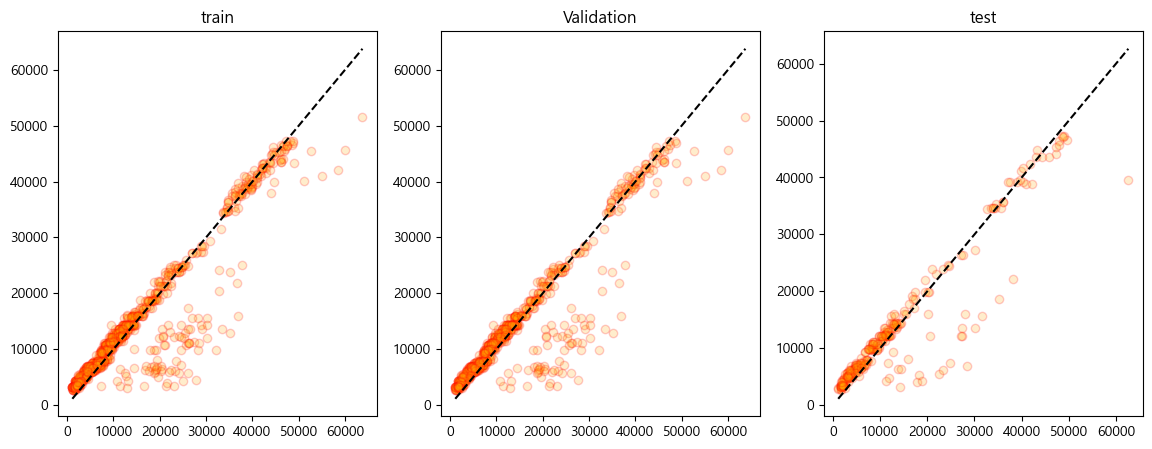

In [120]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(14, 5))

# 예측
prediction = kf_gb_r.predict(X_train)
# 평가
get_evaluation(y_train, prediction)

ax[0].scatter(y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--')
ax[0].set_title('train')

# 예측
prediction = kf_gb_r.predict(val_X_train)
# 평가
get_evaluation(val_y_train, prediction)

ax[1].scatter(val_y_train, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[1].plot([val_y_train.min(), val_y_train.max()], [val_y_train.min(), val_y_train.max()], 'k--')
ax[1].set_title('Validation')

# 예측
prediction = kf_gb_r.predict(X_test)
# 평가
get_evaluation(y_test, prediction)

ax[2].scatter(y_test, prediction, edgecolors='red', c='orange', alpha=0.2)
ax[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
ax[2].set_title('test')

plt.show()

#### 📊 torch

In [121]:
import torch
from sklearn.model_selection import train_test_split
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD

# 랜덤 값 지정
torch.manual_seed(124)

# 데이터 세트 분리
# 피처, 타겟 데이터 분리
features, targets = dr_m_df.iloc[:, :-1], dr_m_df.iloc[:, -1]

# 문제/정답 및 학습/훈련 데이터 분리
X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

# 검증 데이터 분리
val_X_train, val_X_test, val_y_train, val_y_test = \
train_test_split(X_train, y_train, test_size=0.2, random_state=124)

# 텐서로 변경 (차원 조정)
val_X_train = torch.FloatTensor(val_X_train.values)
val_y_train = torch.FloatTensor(val_y_train.values).view(-1, 1)

val_X_test = torch.FloatTensor(val_X_test.values)
val_y_test = torch.FloatTensor(val_y_test.values).view(-1, 1)

# 선형 회귀 모델
l_r_train = Linear(5, 1)
l_r_val = Linear(5, 1)

# 경사 하강법 (최적화 알고리즘)
optimizer_train = SGD(l_r_train.parameters(), lr=1e-5)
optimizer_val = SGD(l_r_train.parameters(), lr=1e-5)

# loss list
train_loss_box = []
val_loss_box = []

In [122]:
# 반복 횟수
epochs = 850000

for epoch in range(1, epochs + 1):
    # 가설 선언
    H = l_r_train(val_X_train)
    # 손실 함수
    train_loss = mse_loss(H, val_y_train)

    # 다음 기울기를 위해 기존 기울기 초기화
    optimizer_train.zero_grad()
    # 손실 함수 미분 후 기울기 계산
    train_loss.backward()
    # W, b 업데이트
    optimizer_train.step()

    # 출력
    if epoch % 1000 == 0:
        train_loss_box.append(train_loss.item())
        
    if epoch % 100 == 0:
        print('{:4d}/{}: '\
              .format(epoch, epochs, l_r_train.weight[0][0].item(), l_r_train.bias[0].item(), train_loss.item()), end='')
        for i, w in enumerate(list(l_r_train.parameters())[0][0]):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r_train.parameters())[1].item(), train_loss.item()))

 100/850000: W1: 212.1024, W2: 2.9757, W3: 163.2659, W4: 6.6651, W5: 8.4585, b: 4.4771, loss: 126533280.0000
 200/850000: W1: 209.3638, W2: 3.3430, W3: 169.0305, W4: 7.7849, W5: 15.8864, b: 4.2183, loss: 126432856.0000
 300/850000: W1: 206.2368, W2: 3.6884, W3: 173.2780, W4: 8.8613, W5: 23.3018, b: 3.9189, loss: 126348512.0000
 400/850000: W1: 203.6003, W2: 4.0247, W3: 176.8399, W4: 9.9217, W5: 30.7104, b: 3.6044, loss: 126272560.0000
 500/850000: W1: 201.3800, W2: 4.3534, W3: 179.8276, W4: 10.9683, W5: 38.1126, b: 3.2772, loss: 126202528.0000
 600/850000: W1: 199.5103, W2: 4.6755, W3: 182.3320, W4: 12.0026, W5: 45.5093, b: 2.9394, loss: 126136720.0000
 700/850000: W1: 197.9357, W2: 4.9920, W3: 184.4295, W4: 13.0262, W5: 52.9008, b: 2.5926, loss: 126073896.0000
 800/850000: W1: 196.6094, W2: 5.3038, W3: 186.1846, W4: 14.0402, W5: 60.2875, b: 2.2382, loss: 126013216.0000
 900/850000: W1: 195.4921, W2: 5.6114, W3: 187.6516, W4: 15.0457, W5: 67.6700, b: 1.8773, loss: 125954056.0000
1000/8

KeyboardInterrupt: 

In [97]:
# 반복 횟수
epochs = 850000

for epoch in range(1, epochs + 1):
    # 가설 선언
    H = l_r_val(val_X_test)
    # 손실 함수
    val_loss = mse_loss(H, val_y_test)

    # 다음 기울기를 위해 기존 기울기 초기화
    optimizer_val.zero_grad()
    # 손실 함수 미분 후 기울기 계산
    val_loss.backward()
    # W, b 업데이트
    optimizer_val.step()

    # 출력
    if epoch % 1000 == 0:
        val_loss_box.append(val_loss.item())
        
    if epoch % 10000 == 0:
        print('{:4d}/{}: '\
              .format(epoch, epochs, l_r_val.weight[0][0].item(), l_r_val.bias[0].item(), val_loss.item()), end='')
        for i, w in enumerate(list(l_r_val.parameters())[0][0]):
            print('W{}: {:.4f}, '\
                  .format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r_val.parameters())[1].item(), val_loss.item()))

10000/850000: W1: -0.1702, W2: -0.0300, W3: -0.0137, W4: -0.2489, W5: -0.3209, b: -0.0475, loss: 328293088.0000
20000/850000: W1: -0.1702, W2: -0.0300, W3: -0.0137, W4: -0.2489, W5: -0.3209, b: -0.0475, loss: 328293088.0000
30000/850000: W1: -0.1702, W2: -0.0300, W3: -0.0137, W4: -0.2489, W5: -0.3209, b: -0.0475, loss: 328293088.0000



KeyboardInterrupt



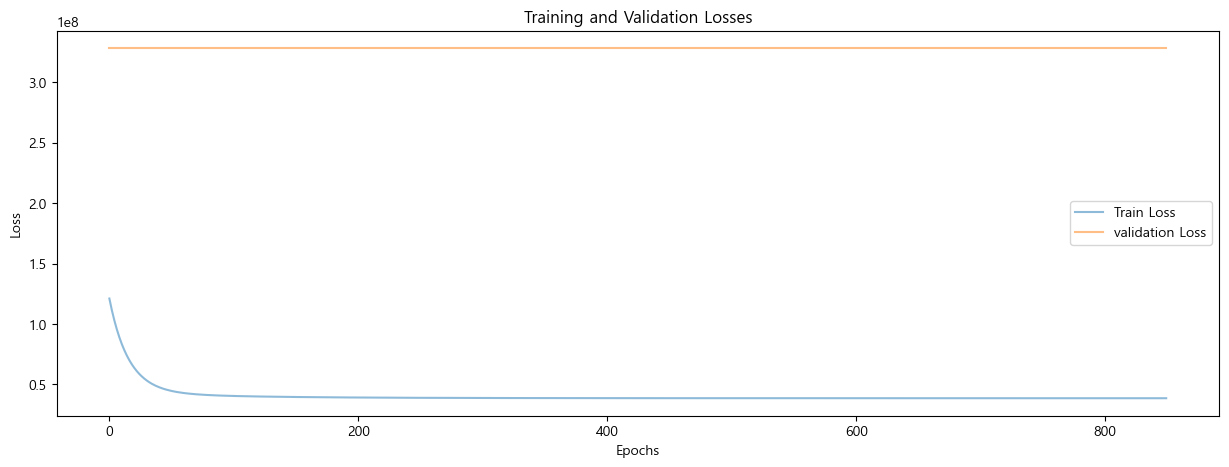

In [94]:
# 손실 그래프 그리기
plt.figure(figsize=(15, 5))
plt.plot(train_loss_box, label='Train Loss', alpha=0.5)
plt.plot(val_loss_box, label='validation Loss', alpha=0.5)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')

plt.legend()
plt.show()